In [3]:
import pandas as pd 
import numpy as np 
# Sklern datasets 
from sklearn.datasets import fetch_openml
# Models import 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes  import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC 
from sklearn.manifold import TSNE
# Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import *
# Normalize / Standart 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Hold out / Grid / Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
# Graphics plot 
import matplotlib.pyplot as plt
import seaborn as sns


# Parte 1

# MINIST DataSet From Sklearn


In [4]:
mnist = fetch_openml('mnist_784')

In [5]:
mnist_df = pd.DataFrame(mnist.frame)
mnist_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [6]:
mnist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: category(1), float64(784)
memory usage: 418.8 MB


Reduce DataSet

In [7]:
mnist_df = mnist_df.sample(5000,random_state=42)

In [8]:
mnist_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
46730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
48393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
41416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
34506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
43725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
36465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
64759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
30769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


Data separation

In [9]:
X = mnist_df.drop(columns=['class'],axis=1)
y = mnist_df['class']

In [10]:
X.shape,y.shape

((5000, 784), (5000,))

<AxesSubplot:>

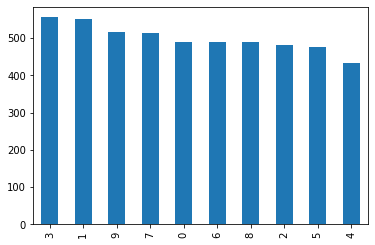

In [11]:
y.value_counts().plot.bar()

In [12]:
def view_number(pos):
    some_digit = X.iloc[pos]
    some_digit = np.array(some_digit)
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    plt.show()


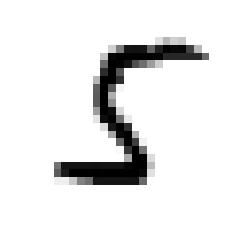

In [13]:
view_number(45)

# Realize a classificação

Starting models


In [14]:
models = {}
models['kNN'] = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
models['Random Forest'] = RandomForestClassifier(n_estimators=250)
models['Naive Bayes'] = GaussianNB()
models['MLP_1'] = MLPClassifier(hidden_layer_sizes=(30,),activation='relu')
models['MLP_2'] = MLPClassifier(hidden_layer_sizes=(30,30),activation='relu')
models['SVM '] = SVC()

Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

Calcule métricas adequadas para o problema e justifique suas escolhas

In [16]:
model_name   = []
result_acc   = []
result_f1    = []
result_recal = []

for actual_model in models: 
    __some_model__ = models[actual_model].fit(X_train,y_train)
    y_predict      = models[actual_model].predict(X_test)
    # score test 
    acc_scr    = accuracy_score(y_test,y_predict)
    f1_scr     = f1_score(y_test,y_predict,average='weighted')
    recall_scr = recall_score(y_test,y_predict,average='weighted')
    # savaing information 
    model_name.append(str(actual_model))
    result_acc.append(acc_scr)
    result_f1.append(f1_scr)
    result_recal.append(recall_scr)

c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
result = pd.DataFrame({'Model name': model_name, 'Accuracy':result_acc, 'F1-Score':result_f1, 'Recall Score':result_recal})

In [18]:
result = result.sort_values(by='Accuracy')
result.reset_index(drop=True, inplace=True)
result

,Model name,Accuracy,F1-Score,Recall Score
0,Naive Bayes,0.57475,0.572163,0.57475
1,MLP_2,0.65850,0.657271,0.65850
2,MLP_1,0.71250,0.712734,0.71250
3,kNN,0.87475,0.873116,0.87475
4,Random Forest,0.90500,0.904457,0.90500
5,SVM,0.92000,0.919733,0.92000


Foi utilizado como métrica de avaliação a acuracia, F1-Score e Recall Score. A acuracia foi utilizada de modo a analisar a frequência em que os classificadores utilizados estavam corretos. O F1-Score nos demonstra as situações em que quando a previsão realmente era um número X o classificador preveu esse número X. De forma semelhante, o Recall Score analisa a mesma situação anterior.

# Realize uma otimização dos hiperparâmetros

In [19]:
k_fold  = KFold(n_splits=3,random_state=42,shuffle=True)

Loading hyperparameters

In [20]:
hyper_1 = {}
hyper_1 ['classifier__n_neighbors'] = [3,9,18,25,45,55]
hyper_1 ['classifier__leaf_size'] = [5,12,20,30]
hyper_1 ['classifier__algorithm'] = ['ball_tree','kd_tree','brute']
hyper_1['classifier'] = [models['kNN']]

hyper_2 = {}
hyper_2 ['classifier__n_estimators'] = [10,50,200]
hyper_2 ['classifier__criterion'] = ['gini', 'entropy']
hyper_2 ['classifier__max_depth'] = [5,20,50,100]
hyper_2['classifier'] = [models['Random Forest']]

hyper_3 = {}
hyper_3 ['classifier__var_smoothing'] = [0.001,0.1,1.60,10]
hyper_3['classifier'] = [models['Naive Bayes']]

hyper_4 = {}
hyper_4 ['classifier__hidden_layer_sizes'] = [(20,),(30,),(80,)]
hyper_4 ['classifier__activation'] = ['identity','logistic','tanh','relu']
hyper_4 ['classifier__alpha'] = [0000.1, 00.1, 1, 10]
hyper_4['classifier'] = [models['MLP_1']]

hyper_5 = {}
hyper_5 ['classifier__hidden_layer_sizes'] = [(20,30),(30,30),(80,80)]
hyper_5 ['classifier__activation'] = ['identity','logistic','tanh','relu']
hyper_5 ['classifier__learning_rate'] = ['constant','invscaling','adaptive']
hyper_5['classifier'] = [models['MLP_2']]

hyper_6 = {}
hyper_6 ['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
hyper_6['classifier'] = [models['SVM ']]


In [21]:
pipe = Pipeline([('classifier', models['kNN'])])
params = [hyper_1,hyper_2,hyper_3,hyper_4,hyper_5,hyper_6]

In [22]:
gridCV  = GridSearchCV(estimator=pipe,param_grid=params,cv=k_fold,n_jobs=-1,scoring='accuracy',return_train_score=True)

In [23]:
%%time
gridCV.fit(X_train,y_train)

CPU times: total: 14.4 s
Wall time: 7min 23s


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        KNeighborsClassifier(n_jobs=-1,
                                                             n_neighbors=3))]),
             n_jobs=-1,
             param_grid=[{'classifier': [KNeighborsClassifier(n_jobs=-1,
                                                              n_neighbors=3)],
                          'classifier__algorithm': ['ball_tree', 'kd_tree',
                                                    'brute'],
                          'classifier__leaf_size': [5, 12, 20, 30],
                          'classifier__n_neighb...
                         {'classifier': [MLPClassifier(hidden_layer_sizes=(30,
                                                                           30))],
                          'classifier__activation': ['identity', 'logistic',
                                                     'tanh', 'relu'],
                          'classifier__hidden_layer_sizes': [(20, 30), (30, 30),
                                                             (80, 80)],
                          'classifier__learning_rate': ['constant',
                                                        'invscaling',
                                                        'adaptive']},
                         {'classifier': [SVC(C=10)],
                          'classifier__C': [0.01, 0.1, 1, 10, 100]}],
             return_train_score=True, scoring='accuracy')

In [24]:
gridCV.best_params_

{'classifier': SVC(C=10), 'classifier__C': 10}

In [25]:
gridCV.best_score_

0.8869827911744079

In [26]:
y_pred_grid_ = gridCV.predict(X_test)
print(classification_report(y_test,y_pred_grid_,digits=4))

              precision    recall  f1-score   support

           0     0.9401    0.9767    0.9581       386
           1     0.9365    0.9794    0.9575       437
           2     0.9119    0.9167    0.9143       384
           3     0.9187    0.9126    0.9156       446
           4     0.8986    0.9292    0.9136       353
           5     0.9223    0.9101    0.9161       378
           6     0.9528    0.9503    0.9515       382
           7     0.9510    0.9327    0.9417       416
           8     0.9199    0.8768    0.8979       406
           9     0.9348    0.9053    0.9199       412

    accuracy                         0.9290      4000
   macro avg     0.9287    0.9290    0.9286      4000
weighted avg     0.9290    0.9290    0.9288      4000



In [27]:
print("Test Accurary:", accuracy_score(y_test, y_pred_grid_))
print("Test Precision:", precision_score(y_test, y_pred_grid_, average='weighted'))
print("Test Recall:", recall_score(y_test, y_pred_grid_, average='weighted'))
print("Test F1-Score:", f1_score(y_test, y_pred_grid_, average='weighted'))

Test Accurary: 0.929
Test Precision: 0.9290296228827787
Test Recall: 0.929
Test F1-Score: 0.9288146277041878


In [28]:
result_grid_df = pd.DataFrame(gridCV.cv_results_)

In [29]:
result_grid_df = result_grid_df.sort_values(by='rank_test_score')
result_grid_df.reset_index(drop=True, inplace=True)
result_grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__algorithm,param_classifier__leaf_size,param_classifier__n_neighbors,param_classifier__criterion,param_classifier__max_depth,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.269280,0.004953,0.251661,0.016315,SVC(C=10),NaN,NaN,NaN,NaN,NaN,...,0.852853,0.903904,0.886983,0.024134,1,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.297869,0.004701,0.260637,0.006112,SVC(C=10),NaN,NaN,NaN,NaN,NaN,...,0.852853,0.903904,0.886983,0.024134,1,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.252325,0.011195,0.273270,0.006958,SVC(C=10),NaN,NaN,NaN,NaN,NaN,...,0.846847,0.894895,0.874992,0.020463,3,0.981982,0.989505,0.971514,0.981000,0.007378
3,1.644601,0.033855,0.085438,0.010843,"(DecisionTreeClassifier(max_features='sqrt', r...",NaN,NaN,NaN,gini,50,...,0.840841,0.873874,0.863987,0.016424,4,1.000000,1.000000,1.000000,1.000000,0.000000
4,1.643274,0.037223,0.086767,0.013555,"(DecisionTreeClassifier(max_features='sqrt', r...",NaN,NaN,NaN,gini,100,...,0.828829,0.894895,0.862998,0.027019,5,1.000000,1.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,5.780271,0.120232,0.020943,0.004952,"MLPClassifier(hidden_layer_sizes=(30,))",NaN,NaN,NaN,NaN,NaN,...,0.576577,0.387387,0.468028,0.079717,185,0.543544,0.773613,0.409295,0.575484,0.150437
185,5.324763,0.083160,0.016951,0.000817,"MLPClassifier(hidden_layer_sizes=(30,))",NaN,NaN,NaN,NaN,NaN,...,0.417417,0.537538,0.465025,0.052105,186,0.500000,0.521739,0.700150,0.573963,0.089668
186,5.343441,0.117827,0.016623,0.002051,"MLPClassifier(hidden_layer_sizes=(30,))",NaN,NaN,NaN,NaN,NaN,...,0.477477,0.546547,0.442140,0.102759,187,0.312312,0.709145,0.530735,0.517397,0.162281
187,5.227348,0.046176,0.023565,0.009006,"MLPClassifier(hidden_layer_sizes=(30,))",NaN,NaN,NaN,NaN,NaN,...,0.174174,0.384384,0.311935,0.097455,188,0.430931,0.244378,0.371814,0.349041,0.077844


First model (best)

In [30]:
result_grid_df['param_classifier'][0]

SVC(C=10)

# Realize a normalização e padronização dos dados, utilize o melhor classificador. Houve melhora/piora dos resultados? Explique

Normalization

In [31]:
scaler = MinMaxScaler()

In [32]:
X_norm_train = scaler.fit_transform(X_train)
X_norm_test  = scaler.fit_transform(X_test)

In [33]:
model_SVM = SVC(C=10, kernel='linear', gamma=0.0001,max_iter=100000)

SVM without normalization and Standardization

In [34]:
model_SVM.fit(X_train,y_train)

SVC(C=10, gamma=0.0001, kernel='linear', max_iter=100000)

In [35]:
SVM_pred = model_SVM.predict(X_test)

In [36]:
print("Test Accurary:", accuracy_score(y_test, SVM_pred))
print("Test Precision:", precision_score(y_test, SVM_pred, average='weighted'))
print("Test Recall:", recall_score(y_test, SVM_pred, average='weighted'))
print("Test F1-Score:", f1_score(y_test, SVM_pred, average='weighted'))

Test Accurary: 0.8805
Test Precision: 0.8803136462550395
Test Recall: 0.8805
Test F1-Score: 0.8797027921632885


SVM with normalization

In [37]:
model_SVM.fit(X_norm_train,y_train)

SVC(C=10, gamma=0.0001, kernel='linear', max_iter=100000)

In [38]:
SVM_norm_pred = model_SVM.predict(X_norm_test)

In [39]:
print("Test Accurary:", accuracy_score(y_test, SVM_norm_pred))
print("Test Precision:", precision_score(y_test, SVM_norm_pred, average='weighted'))
print("Test Recall:", recall_score(y_test, SVM_norm_pred, average='weighted'))
print("Test F1-Score:", f1_score(y_test, SVM_norm_pred, average='weighted'))

Test Accurary: 0.88025
Test Precision: 0.8800510529390559
Test Recall: 0.88025
Test F1-Score: 0.8794600869967546


Data Standardization


In [40]:
scaler = StandardScaler()

In [41]:
X_std_train = scaler.fit_transform(X_train)
X_std_test  = scaler.fit_transform(X_test)

In [42]:
model_SVM = SVC(C=10, kernel='linear', gamma=0.0001,max_iter=100000)

In [43]:
model_SVM.fit(X_std_train,y_train)

SVC(C=10, gamma=0.0001, kernel='linear', max_iter=100000)

In [44]:
SVM_std_pred = model_SVM.predict(X_std_test)

In [45]:
print("Test Accurary:", accuracy_score(y_test, SVM_std_pred))
print("Test Precision:", precision_score(y_test, SVM_std_pred, average='weighted'))
print("Test Recall:", recall_score(y_test, SVM_std_pred, average='weighted'))
print("Test F1-Score:", f1_score(y_test, SVM_std_pred, average='weighted'))

Test Accurary: 0.873
Test Precision: 0.8730873189944997
Test Recall: 0.873
Test F1-Score: 0.8720613121482695


Observando tanto o resultado de normalização quanto da padronização percebe-se que houve uma piora nos resultados. Em todas as métricas utilizadas houve uma pequena queda de acertividade. Tanto na padronização quanto na normalização os valores de C estão constantes sendo que o valor de C define o valor de penalidade do modelo. Sendo assim, sem alterar esse hiperparâmetro significa que as classificações erradas não são mais penalizadas de forma adequada. 

# Varie a porcentagem de dados utilizados. Discuta os resultados.


In [46]:
def train_test_algs(X_train, X_test, y_train, y_test):
    model_name   = []
    result_acc   = []
    result_f1    = []
    result_recal = []

    for actual_model in models: 
        __some_model__ = models[actual_model].fit(X_train,y_train)
        y_predict      = models[actual_model].predict(X_test)
        # score test 
        acc_scr    = accuracy_score(y_test,y_predict)
        f1_scr     = f1_score(y_test,y_predict,average='weighted')
        recall_scr = recall_score(y_test,y_predict,average='weighted')
        # savaing information 
        model_name.append(str(actual_model))
        result_acc.append(acc_scr)
        result_f1.append(f1_scr)
        result_recal.append(recall_scr)
    
    return model_name,result_acc,result_f1,result_recal

In [47]:
def Pd_Result_Create(model_name,result_acc,result_f1,result_recal):
    result =  pd.DataFrame({'Model name': model_name, 'Accuracy':result_acc, 'F1-Score':result_f1, 'Recall Score':result_recal})
    result = result.sort_values(by='Accuracy')
    result.reset_index(drop=True, inplace=True)
    return result

Test  = 33%
Train = 67%

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=2022)

In [49]:
model_name,result_acc,result_f1,result_recal = train_test_algs(X_train, X_test, y_train, y_test)

Results

In [50]:
Pd_Result_Create(model_name,result_acc,result_f1,result_recal)

,Model name,Accuracy,F1-Score,Recall Score
0,Naive Bayes,0.635152,0.612491,0.635152
1,MLP_2,0.804848,0.804381,0.804848
2,MLP_1,0.848485,0.849851,0.848485
3,kNN,0.929091,0.928626,0.929091
4,Random Forest,0.932727,0.932422,0.932727
5,SVM,0.947879,0.947704,0.947879


Test  = 50%
Train = 50%

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=2022)

In [52]:
model_name,result_acc,result_f1,result_recal = train_test_algs(X_train, X_test, y_train, y_test)

c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Result

In [53]:
Pd_Result_Create(model_name,result_acc,result_f1,result_recal)

,Model name,Accuracy,F1-Score,Recall Score
0,Naive Bayes,0.6028,0.575100,0.6028
1,MLP_2,0.8188,0.819532,0.8188
2,MLP_1,0.8460,0.847501,0.8460
3,kNN,0.9140,0.913559,0.9140
4,Random Forest,0.9296,0.929320,0.9296
5,SVM,0.9472,0.947070,0.9472


Test  = 90%
Train = 10%

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9,random_state=2022)

In [55]:
model_name,result_acc,result_f1,result_recal = train_test_algs(X_train, X_test, y_train, y_test)

c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Result

In [56]:
Pd_Result_Create(model_name,result_acc,result_f1,result_recal)

,Model name,Accuracy,F1-Score,Recall Score
0,Naive Bayes,0.578222,0.582973,0.578222
1,MLP_2,0.584000,0.580975,0.584000
2,MLP_1,0.613333,0.608691,0.613333
3,kNN,0.823111,0.821238,0.823111
4,Random Forest,0.860889,0.859392,0.860889
5,SVM,0.884889,0.884211,0.884889


Analisando os resultados percebe-se que quando temos mais dados para treino os valores resultantes das métricas tende a ser maior. De forma contrária, deixar muitos dados apenas para teste resulta em um modelo mal treinado e consequentemente valores baixos nas métricas utilizadas. 

# Parte 2

# Utilize o K-means. Realize experimentos com 10 clusters.


In [57]:
pca = PCA(n_components=2).fit_transform(X)

In [58]:
model_K_means = KMeans(n_clusters=10)


In [59]:
model_K_means.fit(pca)

KMeans(n_clusters=10)

In [60]:
labels = model_K_means.labels_
silhouette_score(pca,labels,metric='euclidean',random_state=42)

0.3590507833835469

Utilize o t-SNE para redução de dimensionalidade.

In [61]:
model_TSNE = TSNE(n_components=2,random_state=42)

In [62]:
tsne_data = model_TSNE.fit_transform(X)

c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [63]:
tsne_data = np.vstack((tsne_data.T, y)).T

c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


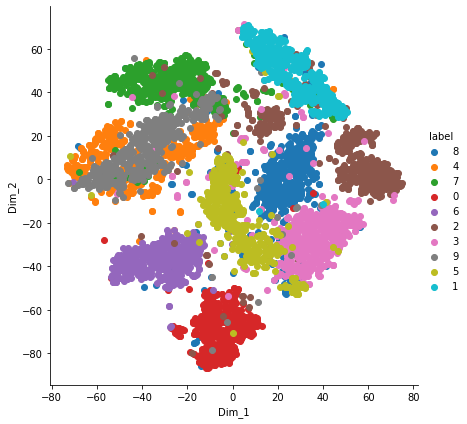

In [64]:
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1','Dim_2','label'))
sns.FacetGrid(tsne_df, hue='label',size=6).map(plt.scatter, 'Dim_1','Dim_2').add_legend()
plt.show()